# Practice Project - 3
# Medical Cost Personal Insurance Datasets

Problem Statement:

Insurance Forecast by using Linear Regression

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?
Downlaod Files:

    https://github.com/dsrscientist/dataset4
    https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [1]:
# Importing/getting all liabraries which we require for our model.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Converting csv file to DataFrame

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
# Checking first and last 5 rows of our dataset. This will get a little idea how our data looks or what content it has.
# checking first 5 rows

data.head ()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# checking last 5 rows.

data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# checking total number of rows and columns of this data

data.shape

(1338, 7)

There are 1338 rows and 7 columns in our data

In [6]:
# Getting some more information our our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical data in our columns
1. Sex
2. Smoker
3. Region

In [7]:
# Checking if our data has any missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in our data

In [8]:
# Understating data at high level, checking some statistical information of our data

data.describe ()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Our data has no null values

Need to visualize the data.

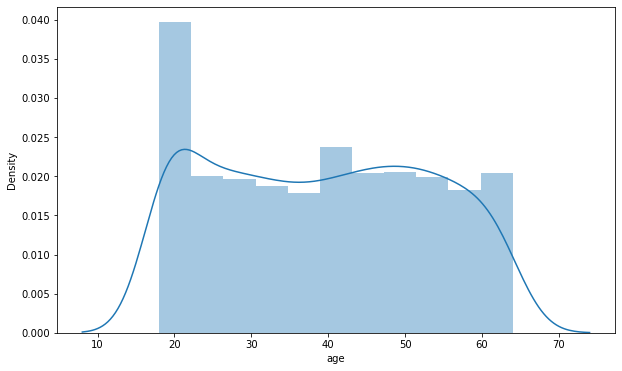

In [9]:
# Distribution of age column

plt.figure(figsize = (10,6))
sns.distplot(data['age'])
plt.show()

With this grap came to know most people are in 20's

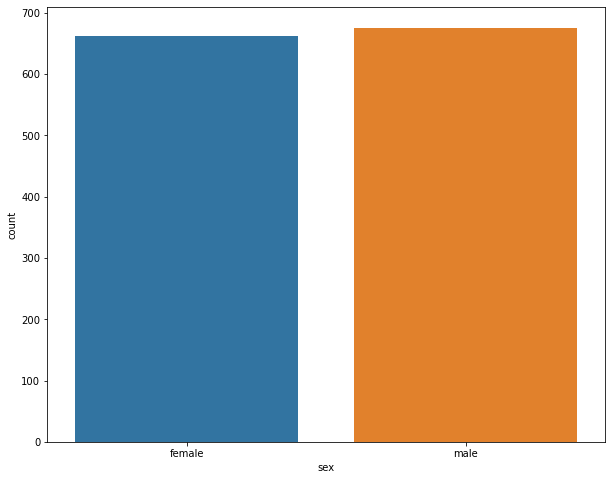

In [10]:
# Checking gender column

plt.figure (figsize=(10,8))
sns.countplot(x='sex', data = data)
plt.show ()

Male and Female are almost equal, however checking exact count.

male   =   676
female   = 662

In [11]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

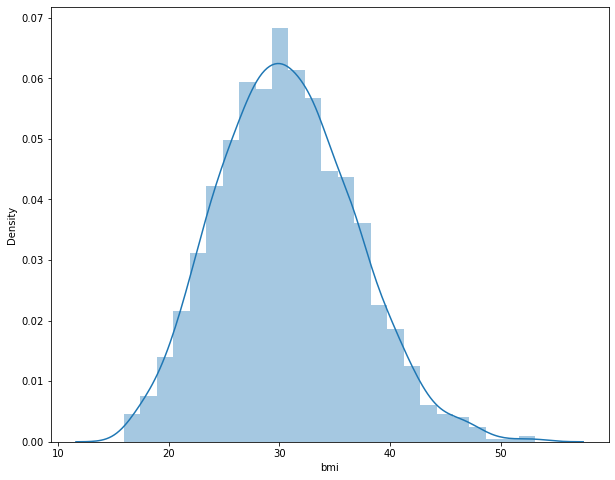

In [12]:
# bmi column's distribution

plt.figure (figsize = (10,8))
sns.distplot(data['bmi'])
plt.show()

Normal BMI range is 18.5 to 24.9
if bmi is less than 18.5 person is under weight and if above 24.9 then person is over weight

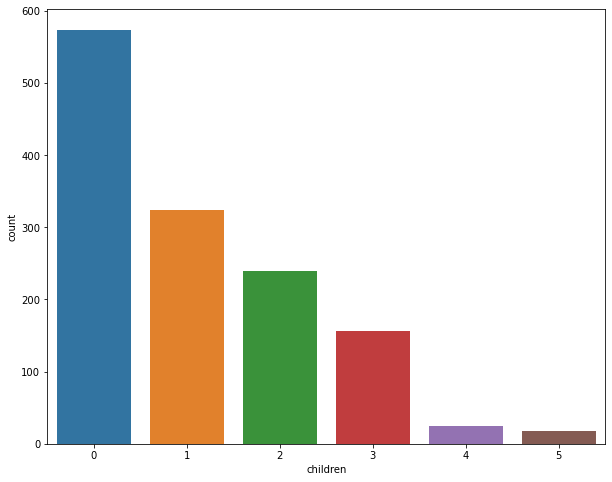

In [13]:
# Checking childern's column
# checked our statisctial data, maximum children is 5 so taking count plot.

plt.figure(figsize = (10,8))
sns.countplot(x='children', data=data)
plt.show()

In [14]:
# checking exact count of number of children
data ['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Here most of them have 0 children

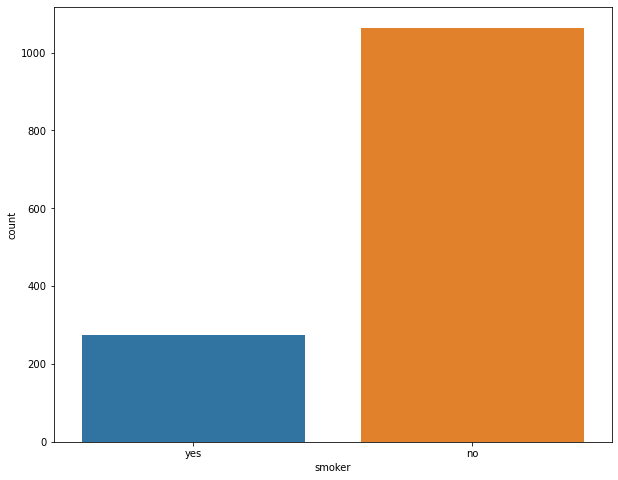

In [15]:
# Similarly checking smokers's column data

plt.figure(figsize = (10,8))
sns.countplot(x='smoker', data=data)
plt.show()

In [16]:
# Checking exact number of smoker and non smoker

data ['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Here most of the people are non smokers

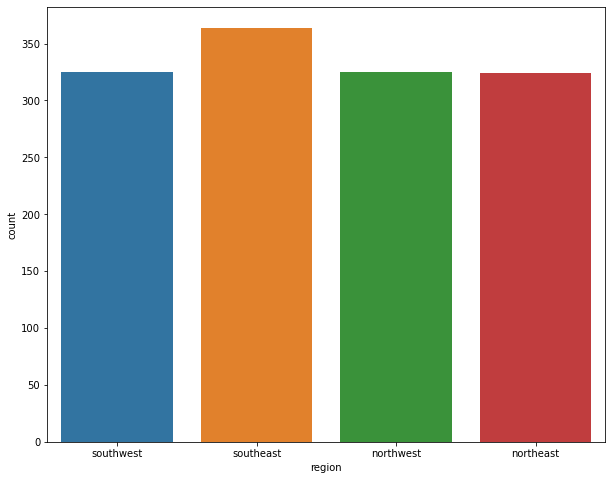

In [17]:
# checking all people distributed region wise, checking region column

plt.figure(figsize = (10,8))
sns.countplot(x='region', data=data)
plt.show()

southeast   = 364
southwest   = 325
northwest   = 325
northeast   = 324

In [18]:
# Checking exact count of people living region wise

data ['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# We will now begin with our data pre processing

In [19]:
# Need to encode categorical data

# encoding sex column

data.replace({'sex':{'male':0, 'female':1}}, inplace = True)

# encoding smoker column

data.replace ({'smoker':{'yes':0 , 'no':1}}, inplace = True)

# encoding region column

data.replace ({'region':{'southeast':0, 'southwest':1 ,'northeast':2, 'northwest':3}}, inplace = True)

Now our categorical data is updated successuflly

In [20]:
# Now need to slipt features and target 

# Spliting charges and assiging it to y

X = data.drop(columns='charges', axis = 1)
Y = data ['charges']
print (X) # checking if data is splited corretly

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [21]:
print (Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Spliting data into Training and Testing Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 2)

In [23]:
# This will give values of our traing and original data

print (X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training using Linear Regression

In [24]:
# Loding the Linear Regression 

regressor = LinearRegression ()

In [25]:
regressor.fit(X_train, Y_train)

LinearRegression()

Now need to proceed with model Evaluation

In [26]:
# Predicition on training data

training_data_prediction = regressor.predict(X_train)

In [27]:
# R-Squared value on train data

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print ('R Squared value: ', r2_train)

R Squared value:  0.751505643411174


In [28]:
# Prediction on test data

training_data_prediction = regressor.predict(X_test)

In [29]:
# R-Squared value on test data

r2_train = metrics.r2_score(Y_test, training_data_prediction)
print ('R Squared value: ', r2_train)

R Squared value:  0.7447273869684077



Building a Predicitive system which will predict the cost/charges

In [30]:
# This data will included all columns except charges, we need to predict charges on basis of other columns

# our columns are age, sex, bmi, children, smoker and region 
# taken categorical data as numbers as changed earlier


input_data = (19,1,27.900,0,0,1)

# Changing input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the arrary

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
# We want value for 1 particular data point this is why reshaped to (1,-1)


prediction = regressor.predict (input_data_reshaped)
print (prediction)


[25597.73941347]


In [31]:
print ('The cost of insurnace is ', prediction[0])

The cost of insurnace is  25597.739413468433
